# Cleaning The Data

**Tasks:** Handling missing values, fixing typos, and deciding what to do with those extreme values (Outliers) we just found.

### Import Necessary Libraries

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

### Load Data

In [34]:
df = pd.read_csv('../data/student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


### Drop duplicates if they exist though we dont have

In [35]:
duplicate_count = df.duplicated().sum()
if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Dropped {duplicate_count} duplicate rows.")

#### AS we got 91 missing values in "parental_education_level" columns lets' drop it or fill it

In [36]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [37]:
df.isnull().sum().value_counts()

0     15
91     1
Name: count, dtype: int64

2. **Types of "Fill" (Imputation Strategies)**

In a professional ML pipeline, there are three main ways to fill data:

**A. Univariate Imputation (Simple)**

You look at the ```parental_education_level``` column by itself.

- **Mode:** Fill with the most common education level (Best for categorical data like this).

- **Constant:** Fill with a value like ```"Unknown"```. This is often the safest "Senior" move because it tells the model that the data was missing, which might actually be a pattern in itself.

**B. Multivariate Imputation (Advanced)**

You use other columns (like ```income or job```, if available) to predict the education level.

- **KNN Imputer:** Finds "similar" students and copies their parents' education level.

**C. Model-Based Filling**

Some models, like **XGBoost** (which you are using), can actually handle missing values automatically without you filling them at all!

In [38]:
Option_one = df.copy()

# Option 1: Fill with the Mode (Most Frequent)
mode_value = Option_one['parental_education_level'].mode()[0]
Option_one['parental_education_level'] = Option_one['parental_education_level'].fillna(mode_value)

In [39]:
Option_one.isnull().sum().value_counts()

0    16
Name: count, dtype: int64

In [40]:
Option_one['parental_education_level'].value_counts()

parental_education_level
High School    483
Bachelor       350
Master         167
Name: count, dtype: int64

In [41]:
Option_two = df.copy()


# Option 2: Fill with a Constant (Senior Move)
# This creates a new category for "Missing Data"
Option_two['parental_education_level'] = Option_two['parental_education_level'].fillna('Unknown')

In [42]:
Option_two.isnull().sum().value_counts()

0    16
Name: count, dtype: int64

In [43]:
Option_two['parental_education_level'].value_counts()

parental_education_level
High School    392
Bachelor       350
Master         167
Unknown         91
Name: count, dtype: int64

Have a look here is my new columns call "Unknown"

### 1. What is "Constant"?

A Constant simply means you pick one specific word or number and use it for every missing gap.

- Instead of guessing the parents' education, you literally type **"Unknown"** or **"Data_Missing"** into those 91 cells.

- **Why do this?** Sometimes, the fact that data is missing is a clue! Maybe parents who didn't finish school are less likely to report their education level. By using "Unknown," you let the **XGBoost** model learn if "Unknown" education correlates with student performance.

### 2. What is "Mode"?
You are correct: **Mode** is the most common (frequent) value in that column.

- If 70% of the parents in your dataset have a "High School" degree, you fill all 91 missing spots with "High School."

- **The Risk:** You are "lying" to the model. You're pretending those 91 parents have a High School degree when they might actually have a PhD or no degree at all. This can "dilute" your data.

### **Recommendation:** 

Since we have 91 missing values, that is a large enough group to be its own category. we will Use Option 2 (Constant) and fill it with "Unknown".

In [44]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [45]:
df['parental_education_level'].value_counts()

parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64

In [46]:
# Fill parental education with "Unknown" (Our constant strategy)
if 'parental_education_level' in df.columns:
    df['parental_education_level'] = df['parental_education_level'].fillna('Unknown')
    print("Filled missing 'parental_education_level' with 'Unknown'.")

Filled missing 'parental_education_level' with 'Unknown'.


In [47]:
df['parental_education_level'].value_counts()

parental_education_level
High School    392
Bachelor       350
Master         167
Unknown         91
Name: count, dtype: int64

Have a look Unknown = 91

In [48]:
df.isna().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [49]:
df.isna().sum().value_counts()

0    16
Name: count, dtype: int64

In [50]:
#Final Validation

remaining_nulls = df.isnull().sum().sum()
print("-" * 30)
print(f"Remaining nulls in dataset: {remaining_nulls}")

------------------------------
Remaining nulls in dataset: 0


In [51]:
df.head().T

,0,1,2,3,4
student_id,S1000,S1001,S1002,S1003,S1004
age,23,20,21,23,19
gender,Female,Female,Male,Female,Female
study_hours_per_day,0.0,6.9,1.4,1.0,5.0
social_media_hours,1.2,2.8,3.1,3.9,4.4
netflix_hours,1.1,2.3,1.3,1.0,0.5
part_time_job,No,No,No,No,No
attendance_percentage,85.0,97.3,94.8,71.0,90.9
sleep_hours,8.0,4.6,8.0,9.2,4.9
diet_quality,Fair,Good,Poor,Poor,Fair


### Let's find the Numerical column

In [52]:
num_cols = [col for col in df.columns if df[col].dtype != 'object' and col != 'student_id']
num_cols.sort()
num_cols

['age',
 'attendance_percentage',
 'exam_score',
 'exercise_frequency',
 'mental_health_rating',
 'netflix_hours',
 'sleep_hours',
 'social_media_hours',
 'study_hours_per_day']

### Let's Check The Outliers

In [53]:
"""
The most common way to define an outlier is the Interquartile Range (IQR) method.
This identifies values that are significantly lower or higher than the middle 50% of your data. 
"""
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

""" 
# Example: Check for outliers in Exam Score
outliers_df, low, high = find_outliers_iqr(df, 'exam_score')
print(f"Exam Score Outliers: {len(outliers_df)} rows found outside [{low:.2f}, {high:.2f}]")
"""
# list to store the summary results
outlier_summary = []

for col in num_cols:
    outliers_df, low, high = find_outliers_iqr(df, col)
    outlier_summary.append({
        'Column': col,
        'Outlier Count': len(outliers_df),
        'Lower Bound': round(low, 2),
        'Upper Bound': round(high, 2),
        'Min Value': df[col].min(),
        'Max Value': df[col].max()
    })

# DataFrame for a clean view
summary_df = pd.DataFrame(outlier_summary)
summary_df

,Column,Outlier Count,Lower Bound,Upper Bound,Min Value,Max Value
0,age,0,12.38,29.38,17.0,24.0
1,attendance_percentage,3,58.46,110.56,56.0,100.0
2,exam_score,2,24.20,115.60,18.4,100.0
3,exercise_frequency,0,-5.00,11.00,0.0,6.0
4,mental_health_rating,0,-4.50,15.50,1.0,10.0
5,netflix_hours,4,-1.29,4.81,0.0,5.4
6,sleep_hours,2,3.05,9.85,3.2,10.0
7,social_media_hours,5,-0.70,5.70,0.0,7.2
8,study_hours_per_day,7,-0.25,7.35,0.0,8.3


### Identify an Outlier

An outlier is simply a data point that is "mathematically distant" from the rest of the observations.

We identify them using two main lenses:

- **Statistical Lens (The Math):** Using our IQR method, any value that falls below the **Lower Bound** or above the **Upper Bound** is flagged. For example, in our ```exam_score```, the lower bound is **24.20**. Because we have a student with an **18.4** (Min Value), they are flagged as an outlier.

- **Contextual Lens (The Logic):** You must ask: "Is this value physically possible?"

    - **Study hours = 8.3:** High, but possible for a dedicated student.

    - **Study hours = 99:** Impossible (there are only 24 hours in a day). This is a "Junk" outlier.

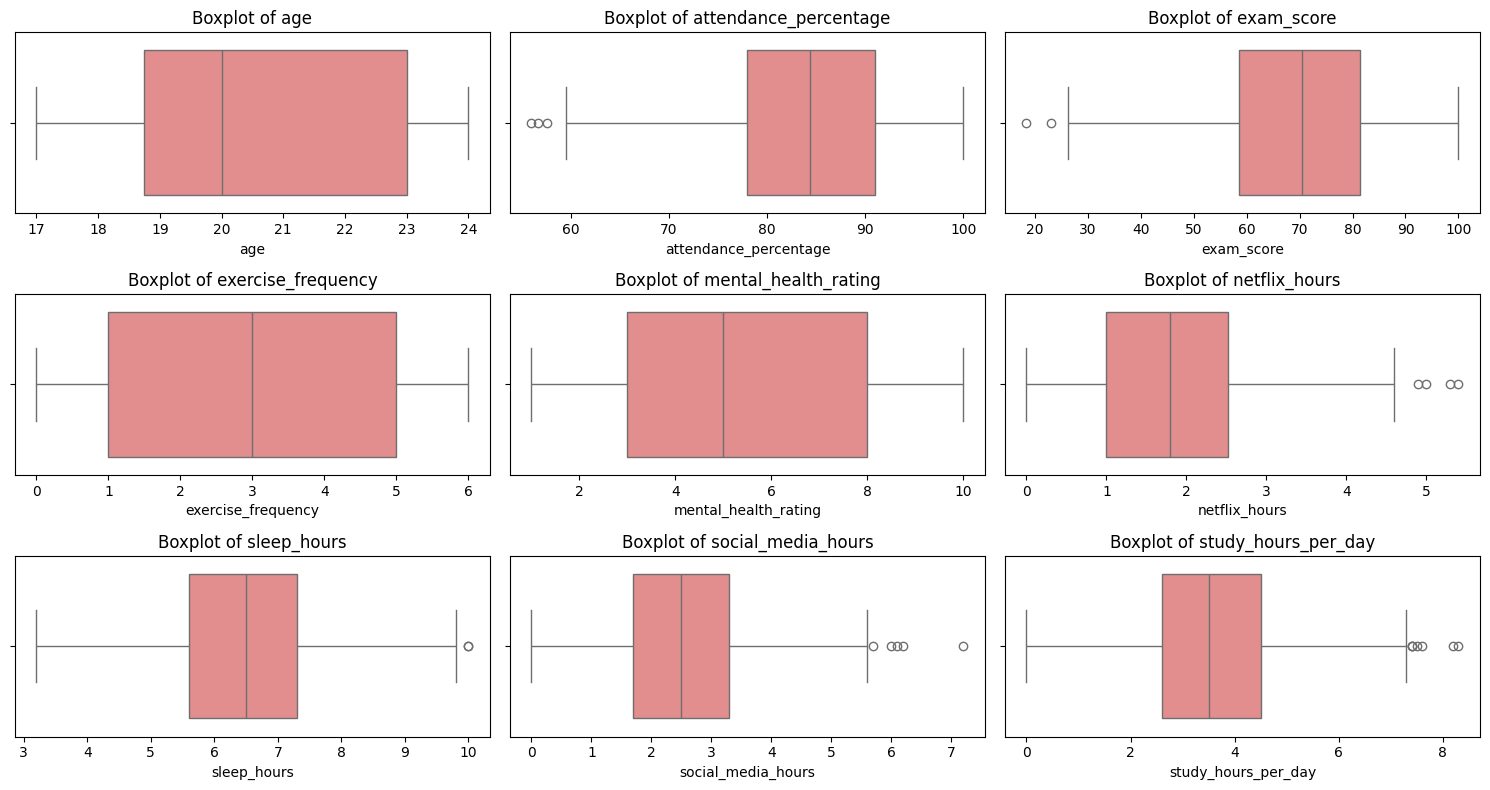

In [54]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### When NOT to Remove Outliers
In most cases, especially with our current dataset, we should **keep** them.

- **Real Human Variation:** our 2 ```exam_score``` outliers (scoring ~18) represent real students who are struggling. If we remove them, our model will never learn how to predict failing grades—it will only know how to predict "average" or "good" students.

- **Small Counts:** We have 1,000 rows. Removing 2 rows (0.2% of our data) won't change the model much, but keeping them provides valuable "edge case" information.

- **Model Robustness:** Modern models like **XGBoost** are very good at handling these small outliers without getting confused.

### Summary for our Dataset
Looking at our final image:

1. **Attendance (3 outliers):** The lower bound is 58.46, and our min is 56.0. This is a very "soft" outlier. we should **Keep** it.

2. **Study Hours (7 outliers):** Our upper bound is 7.35, and our max is 8.3. This is just a hard-working student. we should **Keep** it.

3. **The Rule of Thumb:** If the value is physically possible, even if it's rare, KEEP IT. Only delete if the number is impossible or clearly a typo.

### Remove Outliers

In [55]:
"""
Filter the dataframe to keep only values within the bounds
"""
# df_cleaned = df[(df['exam_score'] >= low) & (df['exam_score'] <= high)]

'\nFilter the dataframe to keep only values within the bounds\n'

In [56]:
""" 
Capping (Winsorizing) Instead of deleting rows, you "cap" the outliers at the maximum allowed value.
This keeps the data but stops the extreme values from confusing the model.
"""
# df['exam_score'] = np.clip(df['exam_score'], low, high)

' \nCapping (Winsorizing) Instead of deleting rows, you "cap" the outliers at the maximum allowed value.\nThis keeps the data but stops the extreme values from confusing the model.\n'

In [57]:
df.shape

(1000, 16)

### Let's Save The Clean Data

In [58]:
df.to_csv('../data/notebookData/student_habits_performance_cleaned.csv', index=False)

### This is for ```src/step/clean.py```

In [59]:
import pandas as pd
import logging
from pathlib import Path
logger = logging.getLogger(__name__)

df = pd.read_csv('../data/student_habits_performance.csv')
def clean_data(df: pd.DataFrame) -> pd.DataFrame:
     """
    Clean the data by:
    - Dropping duplicates and null values
    - Converting datetime column
    - Renaming key columns
    - Removing extreme outliers
    """
     # Create a copy so we don't modify the original unintentionally
     df_clean = df.copy()

     # Remove Duplicate Rows
     duplicate_count = df_clean.duplicated().sum()
     if duplicate_count > 0:
          df_clean = df_clean.drop_duplicates()
          logger.info(f"Cleaning: Removed {duplicate_count} duplicate rows.")


     # Handle Specific Missing Values
     # We use 'Unknown' for education to preserve the 'missingness' as a feature
     if 'parental_education_level' in df_clean.columns:
          df_clean['parental_education_level'] = df_clean['parental_education_level'].fillna('Unknown')
          logger.info("Cleaning: Filled 'parental_education_level' nulls with 'Unknown'.")

     # Final Integrity Check
     remaining_nulls = df_clean.isnull().sum().sum()
     if remaining_nulls > 0:
          logger.warning(f"Warning: {remaining_nulls} nulls still remain in other columns!")
     
     return df_clean


if __name__ == "__main__":
    df = clean_data(df=df)
    print("Cleaning completed.\n")
    print(f"Duplicates found: {duplicate_count}")
    print("-" * 30)
    print(f"Null values per column:{remaining_nulls[remaining_nulls > 0]}")
    print("-" * 30)
    print(f"Cleaned data shape: {df.shape}\n")
    print(f"Filled parental education levels with 'Unknown':\n{df['parental_education_level'].value_counts()}")

Cleaning completed.

Duplicates found: 0
------------------------------
Null values per column:[]
------------------------------
Cleaned data shape: (1000, 16)

Filled parental education levels with 'Unknown':
parental_education_level
High School    392
Bachelor       350
Master         167
Unknown         91
Name: count, dtype: int64
